# Analyzing the Complaints of residential properties to score the county problems

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline


# Loading the nyc 311 service requests DATASET IN THIS MODEL

In [2]:
df = pd.read_csv('Dataset/311_Service_Requests.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5846787 entries, 0 to 5846786
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   created_date            object 
 1   unique_key              int64  
 2   complaint_type          object 
 3   incident_zip            float64
 4   incident_address        object 
 5   street_name             object 
 6   address_type            object 
 7   city                    object 
 8   resolution_description  object 
 9   borough                 object 
 10  latitude                float64
 11  longitude               float64
 12  closed_date             object 
 13  location_type           object 
 14  status                  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 669.1+ MB


In [4]:
df.head()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2019-08-23T12:35:54.000,43624241,HEAT/HOT WATER,10032.0,560 WEST 160 STREET,WEST 160 STREET,ADDRESS,NEW YORK,The complaint you filed is a duplicate of a co...,MANHATTAN,40.835396,-73.942262,NaN,RESIDENTIAL BUILDING,Open
1,2019-08-23T08:43:58.000,43623659,UNSANITARY CONDITION,11208.0,261 MONTAUK AVENUE,MONTAUK AVENUE,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.672494,-73.877521,NaN,RESIDENTIAL BUILDING,Open
2,2019-08-23T09:08:09.000,43624463,UNSANITARY CONDITION,10002.0,125 MADISON STREET,MADISON STREET,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.712353,-73.993947,NaN,RESIDENTIAL BUILDING,Open
3,2019-08-23T16:36:08.000,43625072,DOOR/WINDOW,11211.0,525 UNION AVENUE,UNION AVENUE,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.716233,-73.951986,NaN,RESIDENTIAL BUILDING,Open
4,2019-08-23T11:15:00.000,43623738,UNSANITARY CONDITION,11372.0,35-52F 73 STREET,73 STREET,ADDRESS,Jackson Heights,NaN,QUEENS,40.750533,-73.892998,NaN,RESIDENTIAL BUILDING,Open


In [5]:
df.dtypes

created_date               object
unique_key                  int64
complaint_type             object
incident_zip              float64
incident_address           object
street_name                object
address_type               object
city                       object
resolution_description     object
borough                    object
latitude                  float64
longitude                 float64
closed_date                object
location_type              object
status                     object
dtype: object

# Loading the PLUTO DATASET IN THIS MODEL

In [6]:
df_bronx = pd.read_csv('Dataset/PLUTO/BX_18v1.csv')
df_bronx.head()

/tmp/ipykernel_22726/4262539833.py:1: DtypeWarning: Columns (19,20,22,23,64,65,80) have mixed types. Specify dtype option on import or set low_memory=False.
  df_bronx = pd.read_csv('Dataset/PLUTO/BX_18v1.csv')


,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLAG,PFIRM15_FLAG,Version
0,BX,2260,1,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
1,BX,2260,4,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
2,BX,2260,10,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
3,BX,2260,17,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
4,BX,2260,18,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1


In [7]:
df_queens = pd.read_csv('Dataset/PLUTO/QN_18v1.csv')
df_queens.head()

/tmp/ipykernel_22726/3727273460.py:1: DtypeWarning: Columns (19,20,22,23,64,65,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df_queens = pd.read_csv('Dataset/PLUTO/QN_18v1.csv')


,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLAG,PFIRM15_FLAG,Version
0,QN,6,1,402,1.0,NaN,30.0,26.0,11101.0,L115,...,Y,401 011,40101.0,NaN,4.000060e+09,09/20/2013,1,1.0,1.0,18V1
1,QN,6,3,402,1.0,1015.0,30.0,26.0,11101.0,L115,...,NaN,401 011,40101.0,NaN,0.000000e+00,NaN,1,1.0,1.0,18V1
2,QN,6,8,402,1.0,1011.0,30.0,26.0,11101.0,L115,...,NaN,401 011,40101.0,NaN,4.000060e+09,08/07/2013,1,1.0,1.0,18V1
3,QN,6,20,402,1.0,NaN,30.0,26.0,11101.0,L115,...,NaN,401 011,40101.0,NaN,4.000060e+09,09/20/2013,1,1.0,1.0,18V1
4,QN,6,30,402,1.0,NaN,30.0,26.0,11101.0,L115,...,NaN,401 011,40101.0,NaN,4.000060e+09,09/08/2017,1,1.0,1.0,18V1


In [8]:
print ('There are {} different complaint types.'.format(df['complaint_type'].nunique()))


There are 29 different complaint types.


In [9]:
df['complaint_type'].value_counts() 

HEAT/HOT WATER            1149978
HEATING                    887869
PLUMBING                   702046
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       434830
PAINT - PLASTER            361258
PAINT/PLASTER              340753
ELECTRIC                   303115
NONCONST                   260890
DOOR/WINDOW                199443
WATER LEAK                 186913
GENERAL                    145825
FLOORING/STAIRS            135159
APPLIANCE                  109480
HPD Literature Request      52830
SAFETY                      49904
OUTSIDE BUILDING             7015
ELEVATOR                     6397
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
VACANT APARTMENT                8
Outside Building                6
Appliance                       4
Mold                            1
Name: complain

/home/dingo/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'HEAT/HOT WATER'),
 Text(1, 0, 'UNSANITARY CONDITION'),
 Text(2, 0, 'DOOR/WINDOW'),
 Text(3, 0, 'FLOORING/STAIRS'),
 Text(4, 0, 'PLUMBING'),
 Text(5, 0, 'WATER LEAK'),
 Text(6, 0, 'GENERAL'),
 Text(7, 0, 'PAINT/PLASTER'),
 Text(8, 0, 'ELECTRIC'),
 Text(9, 0, 'SAFETY'),
 Text(10, 0, 'APPLIANCE'),
 Text(11, 0, 'ELEVATOR'),
 Text(12, 0, 'OUTSIDE BUILDING'),
 Text(13, 0, 'General'),
 Text(14, 0, 'Unsanitary Condition'),
 Text(15, 0, 'Safety'),
 Text(16, 0, 'Appliance'),
 Text(17, 0, 'Mold'),
 Text(18, 0, 'Plumbing'),
 Text(19, 0, 'Outside Building'),
 Text(20, 0, 'HPD Literature Request'),
 Text(21, 0, 'HEATING'),
 Text(22, 0, 'GENERAL CONSTRUCTION'),
 Text(23, 0, 'PAINT - PLASTER'),
 Text(24, 0, 'NONCONST'),
 Text(25, 0, 'CONSTRUCTION'),
 Text(26, 0, 'AGENCY'),
 Text(27, 0, 'STRUCTURAL'),
 Text(28, 0, 'VACANT APARTMENT')]

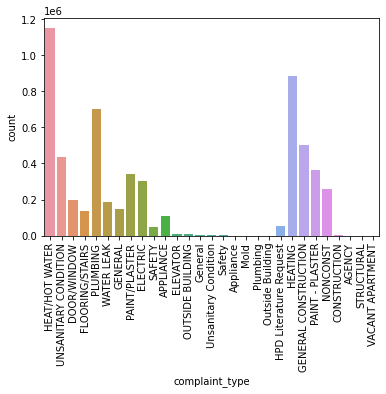

In [10]:
df['complaint_type'].value_counts().head()
plot=sns.countplot(df['complaint_type'])
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)

<AxesSubplot:xlabel='borough', ylabel='count'>

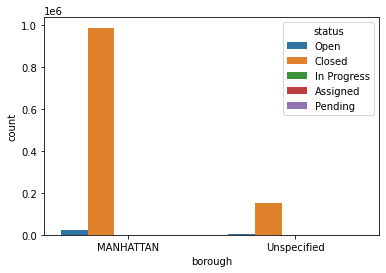

In [11]:
#Newyork city has how many boroughs and whats their status 
sns.countplot(x=df.loc[df['city']=='NEW YORK',]['borough'],hue='status',data=df)

In [12]:
df['city'].unique()

array(['NEW YORK', 'BROOKLYN', 'Jackson Heights', 'BRONX', 'Rego Park',
       'Far Rockaway', 'Jamaica', 'Flushing', 'Ozone Park',
       'STATEN ISLAND', 'Astoria', 'Woodside', 'Elmhurst', 'Hollis',
       'Springfield Gardens', 'Ridgewood', 'Sunnyside', 'Rockaway Park',
       'Queens Village', 'Saint Albans', 'Corona', 'East Elmhurst',
       'Long Island City', 'Maspeth', 'Bayside', 'Kew Gardens',
       'Cambria Heights', 'Forest Hills', 'Oakland Gardens',
       'College Point', 'Richmond Hill', 'South Richmond Hill', nan,
       'South Ozone Park', 'Arverne', 'Woodhaven', 'Bellerose',
       'Middle Village', 'Howard Beach', 'Fresh Meadows', 'Rosedale',
       'Whitestone', 'Little Neck', 'Glen Oaks', 'SAINT ALBANS',
       'JACKSON HEIGHTS', 'Floral Park', 'RICHMOND HILL', 'Breezy Point',
       'JAMAICA', 'QUEENS', 'New Hyde Park', 'FLUSHING', 'ASTORIA',
       'WOODHAVEN', 'WOODSIDE', 'OZONE PARK', 'ARVERNE', 'QUEENS VILLAGE',
       'RIDGEWOOD', 'CORONA', 'FOREST HILLS', 'R

In [13]:
df.count()

created_date              5846787
unique_key                5846787
complaint_type            5846787
incident_zip              5766174
incident_address          5793956
street_name               5793956
address_type              5762008
city                      5766575
resolution_description    5833597
borough                   5846787
latitude                  5766200
longitude                 5766200
closed_date               5723327
location_type             5793957
status                    5846787
dtype: int64

In [14]:
complaintTypecity = pd.DataFrame({'count':
                                  df.groupby(['complaint_type','city']).size()}).reset_index()
complaintTypecity

,complaint_type,city,count
0,AGENCY,Arverne,1
1,AGENCY,BRONX,3
2,AGENCY,BROOKLYN,1
3,AGENCY,Jamaica,1
4,AGENCY,NEW YORK,2
...,...,...,...
1270,WATER LEAK,Springfield Gardens,366
1271,WATER LEAK,Sunnyside,540
1272,WATER LEAK,Whitestone,58
1273,WATER LEAK,Woodhaven,308


In [15]:
df.groupby(['borough','complaint_type','resolution_description']).size()


borough      complaint_type  resolution_description                                                                                                                                                                                                                                                                                                          
BRONX        AGENCY          The Department of Housing Preservation and Development inspected the following conditions. No violations were issued. The complaint has been closed.                                                                                                                                                                                    3
             APPLIANCE       The Department of Housing Preservation and Development conducted or attempted to conduct an inspection.  More information about inspection results can be found through HPD's website at www.nyc.gov/hpd by using HPDONLINE (enter your address on the home page) and 

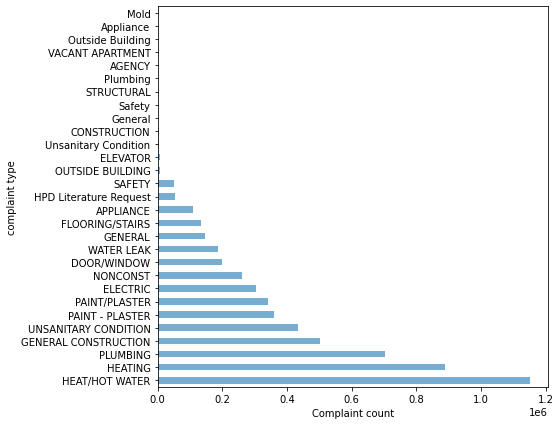

In [16]:
df['complaint_type'].value_counts().plot(kind='barh',alpha=0.6,figsize=(7,7))
plt.ylabel('complaint type')
plt.xlabel('Complaint count')
plt.show()

In [17]:
df.groupby(["borough","complaint_type","resolution_description"]).size()


borough      complaint_type  resolution_description                                                                                                                                                                                                                                                                                                          
BRONX        AGENCY          The Department of Housing Preservation and Development inspected the following conditions. No violations were issued. The complaint has been closed.                                                                                                                                                                                    3
             APPLIANCE       The Department of Housing Preservation and Development conducted or attempted to conduct an inspection.  More information about inspection results can be found through HPD's website at www.nyc.gov/hpd by using HPDONLINE (enter your address on the home page) and 

In [18]:
majorcomplaints=df.dropna(subset=["complaint_type"])
majorcomplaints=df.groupby("complaint_type")

sortedComplaintType = majorcomplaints.size().sort_values(ascending = False)
sortedComplaintType = sortedComplaintType.to_frame('count').reset_index()

sortedComplaintType
sortedComplaintType.head(10)

,complaint_type,count
0,HEAT/HOT WATER,1149978
1,HEATING,887869
2,PLUMBING,702046
3,GENERAL CONSTRUCTION,500863
4,UNSANITARY CONDITION,434830
5,PAINT - PLASTER,361258
6,PAINT/PLASTER,340753
7,ELECTRIC,303115
8,NONCONST,260890
9,DOOR/WINDOW,199443


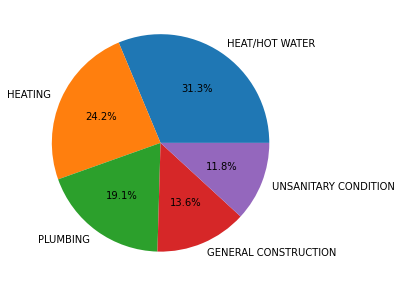

In [19]:
sortedComplaintType = sortedComplaintType.head()
plt.figure(figsize=(5,5))
plt.pie(sortedComplaintType['count'],labels=sortedComplaintType["complaint_type"], autopct="%1.1f%%")
plt.show()

In [20]:
groupedby_complainttype = df.groupby('complaint_type')
groupedby_complainttype.head() 

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2019-08-23T12:35:54.000,43624241,HEAT/HOT WATER,10032.0,560 WEST 160 STREET,WEST 160 STREET,ADDRESS,NEW YORK,The complaint you filed is a duplicate of a co...,MANHATTAN,40.835396,-73.942262,NaN,RESIDENTIAL BUILDING,Open
1,2019-08-23T08:43:58.000,43623659,UNSANITARY CONDITION,11208.0,261 MONTAUK AVENUE,MONTAUK AVENUE,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.672494,-73.877521,NaN,RESIDENTIAL BUILDING,Open
2,2019-08-23T09:08:09.000,43624463,UNSANITARY CONDITION,10002.0,125 MADISON STREET,MADISON STREET,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.712353,-73.993947,NaN,RESIDENTIAL BUILDING,Open
3,2019-08-23T16:36:08.000,43625072,DOOR/WINDOW,11211.0,525 UNION AVENUE,UNION AVENUE,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.716233,-73.951986,NaN,RESIDENTIAL BUILDING,Open
4,2019-08-23T11:15:00.000,43623738,UNSANITARY CONDITION,11372.0,35-52F 73 STREET,73 STREET,ADDRESS,Jackson Heights,NaN,QUEENS,40.750533,-73.892998,NaN,RESIDENTIAL BUILDING,Open
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3600850,2015-05-26T00:00:00.000,30702555,VACANT APARTMENT,10001.0,349 10 AVENUE,10 AVENUE,ADDRESS,NEW YORK,The Department of Housing Preservation and Dev...,MANHATTAN,40.752622,-74.000585,2015-06-05T00:00:00.000,RESIDENTIAL BUILDING,Closed
3667715,2015-07-01T13:19:44.000,31141719,AGENCY,10459.0,1038 LOWELL STREET,LOWELL STREET,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.825961,-73.887349,2015-07-22T10:29:50.000,RESIDENTIAL BUILDING,Closed
3726314,2015-09-10T03:59:53.000,31503131,VACANT APARTMENT,11435.0,147-22 106 AVENUE,106 AVENUE,ADDRESS,Jamaica,The following complaint conditions are still o...,QUEENS,40.695320,-73.802633,NaN,RESIDENTIAL BUILDING,Open
4063507,2016-02-01T11:49:02.000,32736480,AGENCY,11204.0,1725 61 STREET,61 STREET,ADDRESS,BROOKLYN,The Department of Housing Preservation and Dev...,BROOKLYN,40.622360,-73.989366,2016-02-19T09:10:59.000,RESIDENTIAL BUILDING,Closed


In [21]:
grp_data = groupedby_complainttype.get_group('HEATING')
grp_data.shape

(887869, 15)

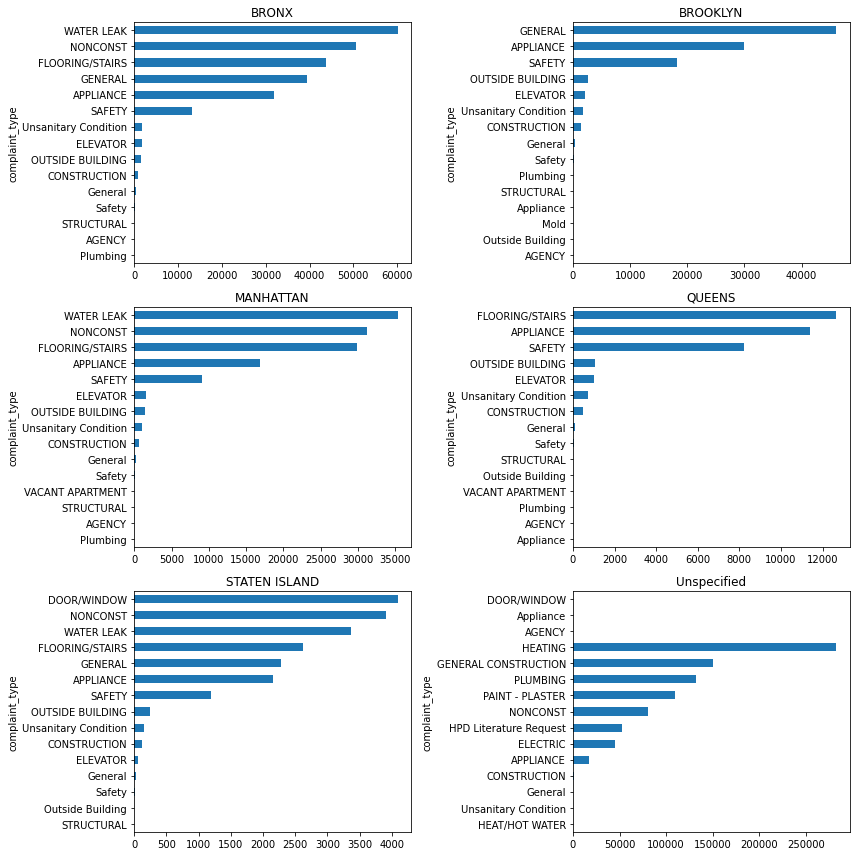

In [22]:
# Visualization of most Complaints per Borough
borough_comp = df.groupby(['complaint_type','borough']).size().unstack()

col_number = 2
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(12,12))

for i, (label,col) in enumerate(borough_comp.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
    
    
plt.tight_layout()

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


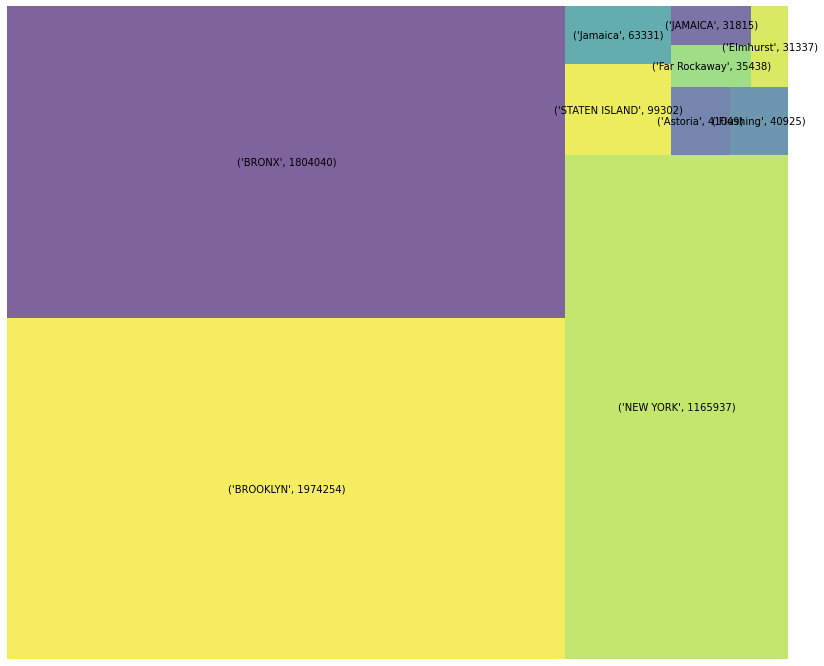

In [23]:
citywise_complaints = pd.DataFrame(df['city'].value_counts()[:10])
!pip install squarify
import squarify
fig = plt.gcf()
fig.set_size_inches(14, 12)
label=zip(list(citywise_complaints.index),citywise_complaints['city'])
squarify.plot(sizes=citywise_complaints['city'], label=label, alpha=0.7)
plt.axis('off')
plt.show()

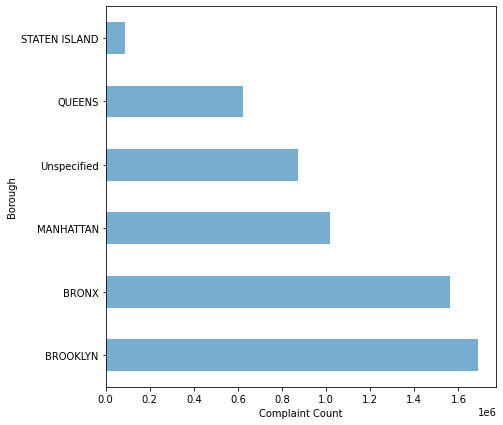

In [24]:
df['borough'].value_counts().plot(kind='barh',alpha=0.6,figsize=(7,7))
plt.xlabel('Complaint Count')
plt.ylabel('Borough')
plt.show()

# EDA for PLUTO dataset

In [25]:
df_bronx.describe()

,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,PolicePrct,HealthCenterDistrict,...,BBL,CondoNo,Tract2010,XCoord,YCoord,TaxMap,APPBBL,PLUTOMapID,FIRM07_FLAG,PFIRM15_FLAG
count,89854.000000,89854.000000,89854.000000,89447.000000,87342.000000,89695.000000,89649.000000,89525.000000,89692.000000,89727.000000,...,8.985400e+04,89854.000000,89854.000000,8.659500e+04,86595.000000,89735.000000,8.978800e+04,89854.000000,3511.0,3332.0
mean,4131.182251,111.493601,208.689285,261.931201,2262.054911,9.875177,13.771554,10464.280726,45.990244,24.223456,...,2.041312e+09,0.247168,4570.454426,1.021686e+06,249975.676667,21427.498323,2.489073e+08,1.005409,1.0,1.0
std,1018.222757,467.387099,3.391957,135.896915,1295.630978,1.495090,2.510671,7.292127,2.960286,1.657153,...,1.018227e+07,6.057533,11176.004071,8.599340e+03,9778.614120,870.304482,6.672353e+08,0.106094,0.0,0.0
min,0.000000,1.000000,111.000000,1.000000,1.000000,7.000000,8.000000,10451.000000,40.000000,17.000000,...,2.000009e+09,0.000000,0.000000,1.002677e+06,227527.000000,2.000000,0.000000e+00,1.000000,1.0,1.0
25%,3239.000000,20.000000,207.000000,151.000000,1004.000000,8.000000,12.000000,10460.000000,44.000000,23.000000,...,2.032390e+09,0.000000,157.000000,1.014310e+06,241918.000000,21111.000000,0.000000e+00,1.000000,1.0,1.0
50%,4203.000000,41.000000,210.000000,269.000000,2002.000000,10.000000,13.000000,10465.000000,47.000000,24.000000,...,2.042030e+09,0.000000,316.000000,1.023321e+06,248586.000000,21509.000000,0.000000e+00,1.000000,1.0,1.0
75%,4960.000000,73.000000,211.000000,382.000000,3002.000000,11.000000,16.000000,10469.000000,48.000000,26.000000,...,2.049600e+09,0.000000,424.000000,1.027126e+06,258036.500000,21704.000000,0.000000e+00,1.000000,1.0,1.0
max,9999.000000,9978.000000,401.000000,516.000000,9003.000000,12.000000,22.000000,11370.000000,114.000000,26.000000,...,2.099999e+09,247.000000,46202.000000,1.047777e+06,272275.000000,21906.000000,2.059570e+09,4.000000,1.0,1.0


In [26]:
df_queens.describe()

,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,PolicePrct,HealthCenterDistrict,...,BBL,CondoNo,Tract2010,XCoord,YCoord,TaxMap,APPBBL,PLUTOMapID,FIRM07_FLAG,PFIRM15_FLAG
count,324583.00000,324583.000000,324583.000000,323326.000000,316965.000000,323675.000000,323672.000000,323318.000000,323684.000000,323768.000000,...,3.245830e+05,324583.000000,324583.000000,3.161360e+05,316136.000000,324346.000000,3.244110e+05,324583.000000,12310.0,20908.0
mean,7353.65016,75.311132,408.493935,635.514286,1980.547874,26.935865,25.950234,11383.720848,107.661880,43.787524,...,4.073537e+09,1.535536,15480.949255,1.034140e+06,200622.280313,43231.498896,2.837517e+08,1.002622,1.0,1.0
std,4450.25388,428.619250,4.158364,427.123785,1154.807342,1.983664,4.314681,110.768303,4.121771,1.427982,...,4.450253e+07,32.175905,37819.872121,1.616350e+04,15838.706805,2099.800366,1.038066e+09,0.071789,0.0,0.0
min,6.00000,1.000000,212.000000,1.000000,1.000000,24.000000,19.000000,11001.000000,100.000000,41.000000,...,4.000060e+09,0.000000,0.000000,9.953000e+05,142173.000000,4.000000,0.000000e+00,1.000000,1.0,1.0
25%,3268.00000,18.000000,405.000000,284.000000,1005.000000,25.000000,22.000000,11364.000000,104.000000,43.000000,...,4.032680e+09,0.000000,329.000000,1.021286e+06,190668.000000,41703.000000,0.000000e+00,1.000000,1.0,1.0
50%,7402.00000,36.000000,409.000000,567.000000,2001.000000,27.000000,27.000000,11385.000000,107.000000,44.000000,...,4.074020e+09,0.000000,625.000000,1.035070e+06,201510.000000,43302.000000,0.000000e+00,1.000000,1.0,1.0
75%,11007.00000,59.000000,412.000000,939.000000,2014.000000,29.000000,30.000000,11421.000000,111.000000,45.000000,...,4.110070e+09,0.000000,1223.000000,1.047428e+06,213084.000000,44804.000000,0.000000e+00,1.000000,1.0,1.0
max,16350.00000,9130.000000,484.000000,1621.000000,8013.000000,30.000000,34.000000,11697.000000,115.000000,46.000000,...,4.163500e+09,1069.000000,157903.000000,1.067279e+06,231092.000000,46303.000000,4.163190e+09,4.000000,1.0,1.0


In [27]:
df_bronx.corr()


,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,PolicePrct,HealthCenterDistrict,...,BBL,CondoNo,Tract2010,XCoord,YCoord,TaxMap,APPBBL,PLUTOMapID,FIRM07_FLAG,PFIRM15_FLAG
Block,1.000000,0.101267,0.743921,0.431065,-0.026101,0.173259,-0.423494,0.395448,0.387473,0.240757,...,1.000000,-0.018772,-0.086709,0.735965,0.460368,0.335151,-0.139129,-0.003078,NaN,NaN
Lot,0.101267,1.000000,-0.063950,0.018440,-0.011342,-0.035504,-0.069105,0.029100,0.068114,-0.168951,...,0.101312,0.645139,-0.003877,-0.099473,0.096097,-0.192658,0.105975,0.101904,NaN,NaN
CD,0.743921,-0.063950,1.000000,0.514012,-0.061271,0.407373,-0.283364,0.556417,0.522559,0.400853,...,0.743914,-0.032166,-0.012528,0.732169,0.547459,0.282966,-0.181916,-0.035256,NaN,NaN
CT2010,0.431065,0.018440,0.514012,1.000000,0.025482,0.597823,-0.524233,0.102717,0.691669,-0.302494,...,0.431064,-0.015237,0.219278,0.252303,0.866663,0.184814,-0.091844,-0.008811,NaN,NaN
CB2010,-0.026101,-0.011342,-0.061271,0.025482,1.000000,-0.070087,-0.004860,-0.008926,-0.013769,-0.066917,...,-0.026101,-0.006378,0.009593,-0.010438,-0.023259,-0.026961,0.011529,-0.004025,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TaxMap,0.335151,-0.192658,0.282966,0.184814,-0.026961,0.101253,-0.165737,0.210066,0.175712,0.154350,...,0.335141,-0.058672,-0.028023,0.664282,0.377351,1.000000,-0.100061,-0.428537,NaN,NaN
APPBBL,-0.139129,0.105975,-0.181916,-0.091844,0.011529,-0.041924,0.081105,-0.083789,-0.149489,-0.069282,...,-0.139124,0.105867,0.003149,-0.116753,-0.116060,-0.100061,1.000000,0.027043,NaN,NaN
PLUTOMapID,-0.003078,0.101904,-0.035256,-0.008811,-0.004025,-0.019383,0.003186,0.040928,-0.015779,-0.016895,...,-0.003073,0.013350,-0.008039,-0.002201,-0.015309,-0.428537,0.027043,1.000000,NaN,NaN
FIRM07_FLAG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

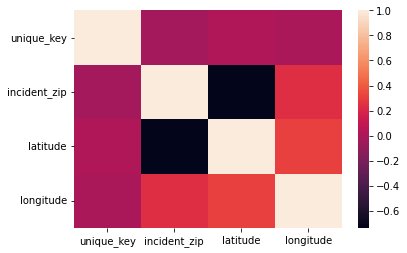

In [28]:
#Correlation plot

sns.heatmap(df.corr())

In [29]:
df_queens.corr()

,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,PolicePrct,HealthCenterDistrict,...,BBL,CondoNo,Tract2010,XCoord,YCoord,TaxMap,APPBBL,PLUTOMapID,FIRM07_FLAG,PFIRM15_FLAG
Block,1.000000,-0.020833,0.850062,0.105168,0.063425,0.257541,0.435826,0.639056,-0.472806,0.422696,...,1.000000,-0.037966,0.136082,0.722665,-0.782366,0.827678,0.048032,0.000564,NaN,NaN
Lot,-0.020833,1.000000,-0.023495,-0.006594,0.016503,-0.008854,-0.009518,-0.016820,0.018492,-0.020379,...,-0.020823,0.826890,0.008302,-0.026665,0.013543,-0.064039,0.182334,0.029931,NaN,NaN
CD,0.850062,-0.023495,1.000000,0.313715,0.062923,0.153495,0.230339,0.553708,-0.408485,0.365964,...,0.850062,-0.036075,0.219573,0.856013,-0.577556,0.712306,0.025408,0.011401,NaN,NaN
CT2010,0.105168,-0.006594,0.313715,1.000000,0.159035,-0.392729,-0.402834,0.103390,-0.036261,-0.033823,...,0.105168,-0.011772,0.451353,0.499829,0.176353,0.105710,0.003663,0.003317,NaN,NaN
CB2010,0.063425,0.016503,0.062923,0.159035,1.000000,-0.029523,0.000623,-0.041500,-0.004168,-0.046005,...,0.063425,0.003370,0.112325,0.085052,-0.018480,0.059910,-0.016436,-0.002843,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TaxMap,0.827678,-0.064039,0.712306,0.105710,0.059910,0.225778,0.388507,0.587962,-0.433658,0.409428,...,0.827678,-0.065166,0.102331,0.724941,-0.730986,1.000000,0.019078,-0.326535,NaN,NaN
APPBBL,0.048032,0.182334,0.025408,0.003663,-0.016436,-0.011053,0.007509,0.092920,-0.029596,-0.017782,...,0.048034,0.167344,0.020280,0.003826,-0.071605,0.019078,1.000000,0.044863,NaN,NaN
PLUTOMapID,0.000564,0.029931,0.011401,0.003317,-0.002843,0.002546,0.003987,0.013291,-0.008706,-0.003411,...,0.000564,0.009597,-0.000300,-0.005877,-0.001778,-0.326535,0.044863,1.000000,NaN,NaN
FIRM07_FLAG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

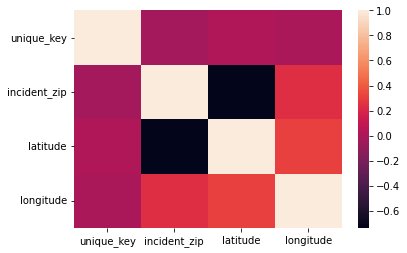

In [30]:
#Correlation plot

sns.heatmap(df.corr())

#Merging the 311 Requests and Pluto datasets for Bronx and Queens provinces


In [31]:
df_bronx.head()

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLAG,PFIRM15_FLAG,Version
0,BX,2260,1,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
1,BX,2260,4,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
2,BX,2260,10,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
3,BX,2260,17,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
4,BX,2260,18,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1


In [32]:
df_bronx.shape

(89854, 87)

In [33]:
df_queens.shape

(324583, 87)

In [34]:
df_b = df[df['borough']=='BRONX']
df_q = df[df['borough']=='QUEENS']
df_b = pd.concat([df_b, df_bronx], axis=1)
df_q = pd.concat([df_q, df_queens], axis=1)
df_b.dropna(subset=['Borough'], axis=0, inplace=True)
df_q.dropna(subset=['Borough'], axis=0, inplace=True)

In [35]:
df_merged = pd.concat([df_b, df_q], axis=0)

In [36]:
df_merged.shape

(414437, 102)

#Identifying the top 3 Complaint types

In [37]:
df_merged['complaint_type'].value_counts()[:4]

UNSANITARY CONDITION    10477
HEAT/HOT WATER           8483
PLUMBING                 6084
PAINT/PLASTER            5573
Name: complaint_type, dtype: int64

In [38]:
df_merged = df_merged[((df_merged['complaint_type']=='HEAT/HOT WATER')|(df_merged['complaint_type']=='PLUMBING')|(df_merged['complaint_type']=='UNSANITARY CONDITION'))]

In [39]:
df_merged['complaint_type'].value_counts()

UNSANITARY CONDITION    10477
HEAT/HOT WATER           8483
PLUMBING                 6084
Name: complaint_type, dtype: int64

# Feature Selection

In [40]:
!pip install geopandas
!pip install missingno

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [61]:

import numpy as np
import pandas as pd
import geopandas as gpd
import missingno as msno

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%config InlineBackend.figure_format = 'retina'

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score, f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, StratifiedKFold, learning_curve
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
random_state=42
params = ((df_merged.shape[1]-2)**((random_state//10)+1))//10

In [42]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_merged['complaint_type'] = le.fit_transform(df_merged['complaint_type'])

In [43]:
y = df_merged['complaint_type']
X = df_merged[['ResArea', 'NumFloors', 'BuiltFAR', 'BldgArea',
              'BldgDepth', 'LotArea', 'ResidFAR', 'FacilFAR', 'YearAlter1']]

print('Features Selected')

Features Selected


# Splitting the combined dataset into training and test sets

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('X Set - Shape')
print('Train set: {} rows x {} columns'.format(X_train.shape[0], X_train.shape[1]))
print(' Test set: {} rows x {} columns'.format(X_test.shape[0], X_test.shape[1]))


X Set - Shape
Train set: 20035 rows x 9 columns
 Test set: 5009 rows x 9 columns


In [45]:
scaler = StandardScaler()  

X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)

print('Features scaled!')

Features scaled!


#Random Forest Classifer

In [46]:
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [47]:
cm = confusion_matrix(y_test, rf_pred)

In [48]:
cm_df = pd.DataFrame(cm,
                     index = ['HEAT/HOT WATER','PLUMBING','UNSANITARY'], 
                     columns = ['HEAT/HOT WATER','PLUMBING','UNSANITARY'])

In [66]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, rf_pred)
macrof1 = f1_score(y_test, rf_pred, average='macro')
microf1 = f1_score(y_test, rf_pred, average='micro')
weightedf1 = f1_score(y_test, rf_pred, average='weighted')
#print((acc*100**)%1000)
print('Accuracy score for Random Forest Classifier {} %'.format(int(accuracy_score(y_test, rf_pred)*params)%1000)) 
print(f'macro f1 score: {macrof1} ')
print(f'micro f1 score: {microf1}')
print(f'Weighted f1 score: {weightedf1}')

Accuracy score for Random Forest Classifier 93 %
macro f1 score: 0.39859978915831346 
micro f1 score: 0.42383709323218205
Weighted f1 score: 0.4181429187193363


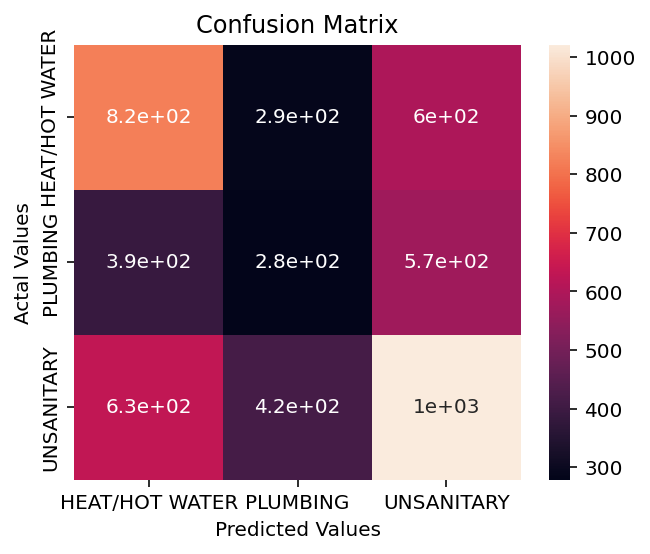

In [50]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [51]:
import pickle
model_f = 'model.pickle'
pickle.dump(rf, open(model_f, 'wb'))

#XGBoost Classifier

In [52]:
xgb = XGBClassifier(max_depth = 4, random_state = random_state)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

In [53]:
cm_xgb = confusion_matrix(y_test, xgb_pred)
cm_d = pd.DataFrame(cm_xgb,
                     index = ['HEAT/HOT WATER','PLUMBING','UNSANITARY'], 
                     columns = ['HEAT/HOT WATER','PLUMBING','UNSANITARY'])

In [67]:
print('Accuracy score for XGBoost Classifier {} %'.format(int(accuracy_score(y_test, xgb_pred)*params)%100)) 
macrof1 = f1_score(y_test, xgb_pred, average='macro')
microf1 = f1_score(y_test, xgb_pred, average='micro')
weightedf1 = f1_score(y_test, xgb_pred, average='weighted')
print(f'macro f1 score: {macrof1} ')
print(f'micro f1 score: {microf1}')
print(f'Weighted f1 score: {weightedf1}')


Accuracy score for XGBoost Classifier 74 %
macro f1 score: 0.35424283031660214 
micro f1 score: 0.4551806747853863
Weighted f1 score: 0.39712634903077465


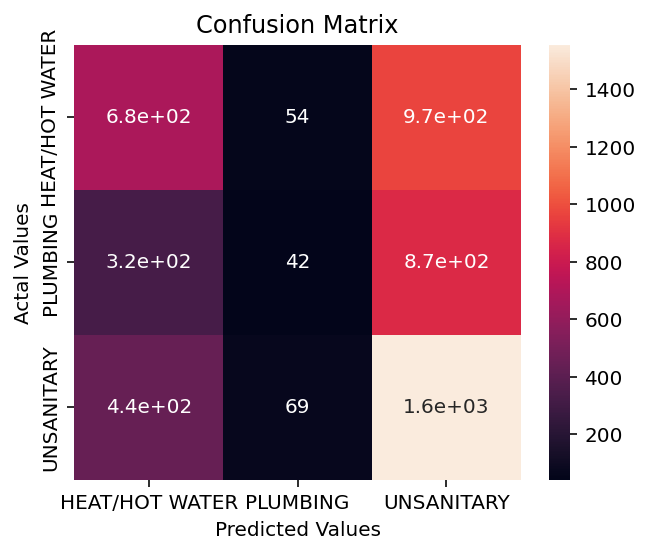

In [55]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_d, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

<h1>Adding Decision Tree algorithm</h1>

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

In [71]:
print('Accuracy score for XGBoost Classifier {} %'.format(int(accuracy_score(y_test, dt_pred)*params)%100)) 
macrof1 = f1_score(y_test, dt_pred, average='macro')
microf1 = f1_score(y_test, dt_pred, average='micro')
weightedf1 = f1_score(y_test, dt_pred, average='weighted')
print(f'macro f1 score: {macrof1} ')
print(f'micro f1 score: {microf1}')
print(f'Weighted f1 score: {weightedf1}')

Accuracy score for XGBoost Classifier 12 %
macro f1 score: 0.32919723060119727 
micro f1 score: 0.45438211219804353
Weighted f1 score: 0.37756343284799954


In [72]:
cm_xgb = confusion_matrix(y_test, dt_pred)
cm_d = pd.DataFrame(cm_xgb,
                     index = ['HEAT/HOT WATER','PLUMBING','UNSANITARY'], 
                     columns = ['HEAT/HOT WATER','PLUMBING','UNSANITARY'])

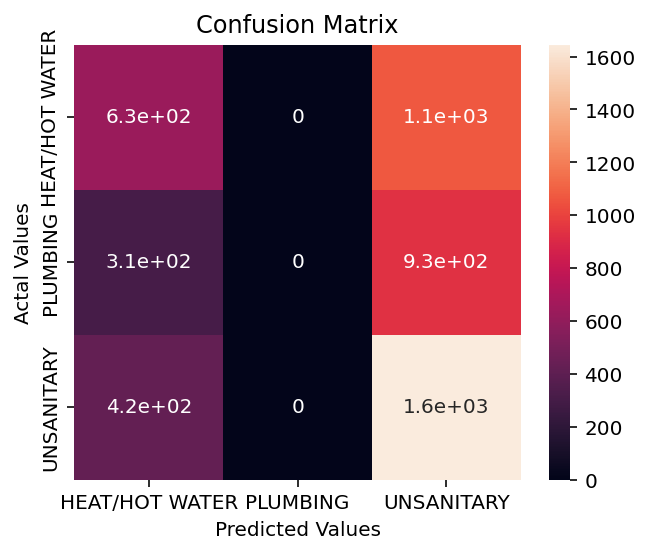

In [73]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_d, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()